In [1]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [3]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
ds=pd.read_csv('/content/drive/MyDrive/Uber-Jan-Feb-FOIL.csv')

In [5]:
ds.head()

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


In [6]:
ds.isnull().sum()


,0
dispatching_base_number,0
date,0
active_vehicles,0
trips,0


In [7]:
ds.duplicated().sum()

np.int64(0)

In [9]:
# Set style
plt.style.use('seaborn-v0_8-darkgrid') # Using a valid seaborn style name
sns.set_palette("Set2")

In [11]:
# Convert 'Date' column to datetime and create time features
ds['date'] = pd.to_datetime(ds['date'])
ds['Day'] = ds['date'].dt.day
ds['Weekday'] = ds['date'].dt.day_name()
ds['Month'] = ds['date'].dt.month_name()

In [ ]:
ds['date']=pd.to_datetime(ds['date'])
ds.set_index('date',inplace=True)#for time series analysis

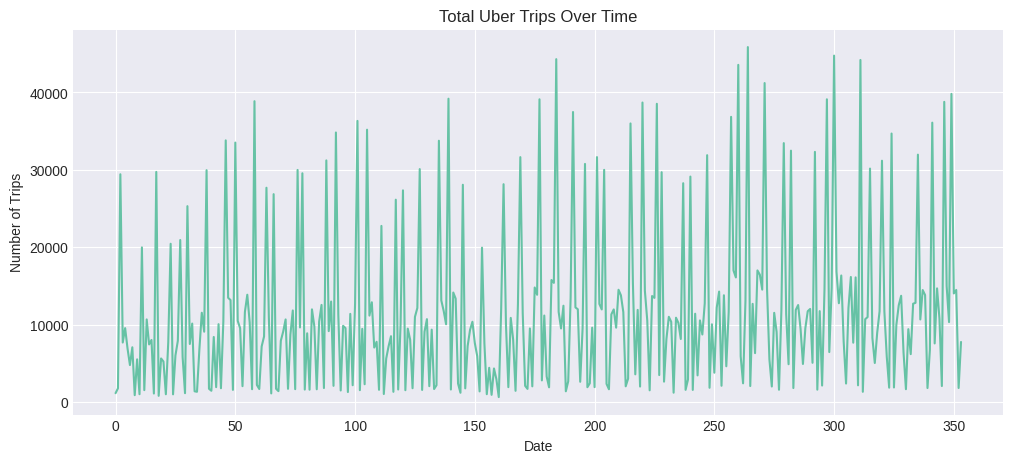

In [14]:
 #1. Trips Over Time
plt.figure(figsize=(12, 5))
sns.lineplot(data=ds, x=ds.index, y='trips') # Use ds.index for the x-axis
plt.title('Total Uber Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.grid(True)
plt.show()

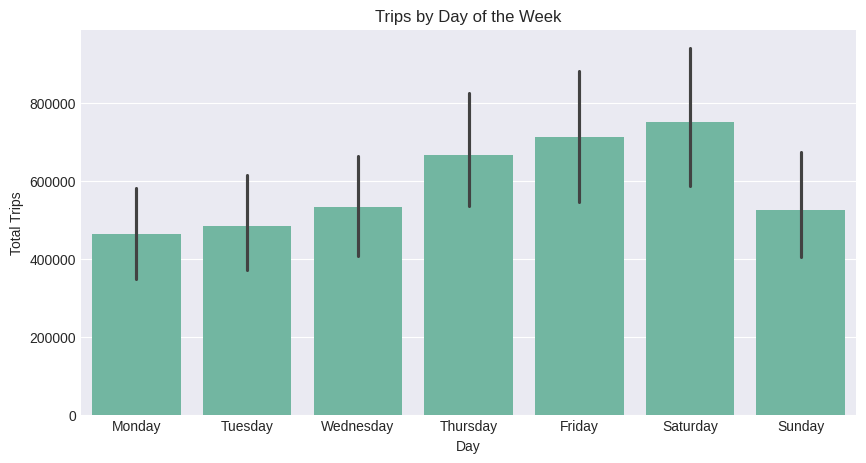

In [16]:
#2. Trips by Weekday
plt.figure(figsize=(10, 5))
sns.barplot(data=ds, x='Weekday', y='trips', estimator='sum', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Trips by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Total Trips')
plt.show()

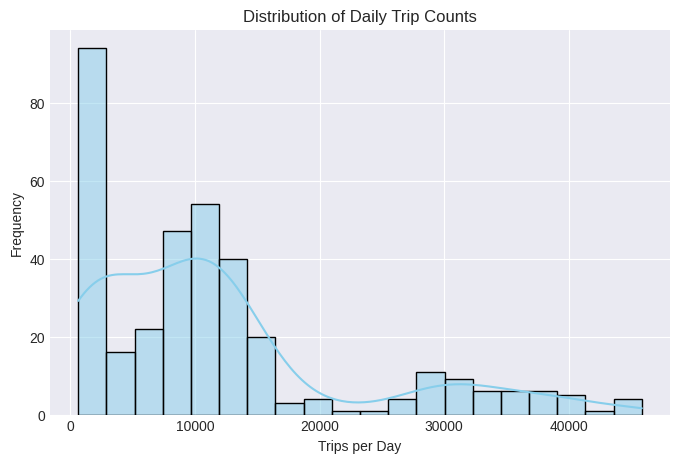

In [18]:
# 3. Distribution of Daily Trips
plt.figure(figsize=(8, 5))
sns.histplot(ds['trips'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Daily Trip Counts')
plt.xlabel('Trips per Day')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

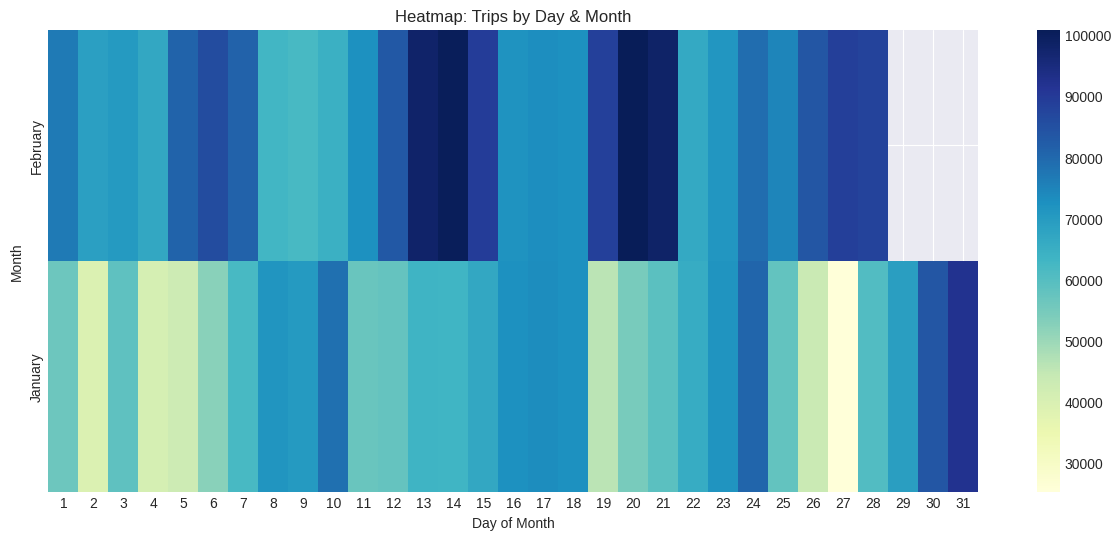

In [21]:
# 4. Heatmap - Day vs Month
pivot_table = ds.pivot_table(values='trips', index='Month', columns='Day', aggfunc='sum')
plt.figure(figsize=(15, 6))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('Heatmap: Trips by Day & Month')
plt.xlabel('Day of Month')
plt.ylabel('Month')
plt.show()

In [23]:
# 5. Interactive Line Chart (Plotly)
ds_reset = ds.reset_index() # Reset index to make date a column
fig = px.line(ds_reset, x='date', y='trips', title='Interactive Trip Trend') # Use 'date' and 'trips'
fig.show()

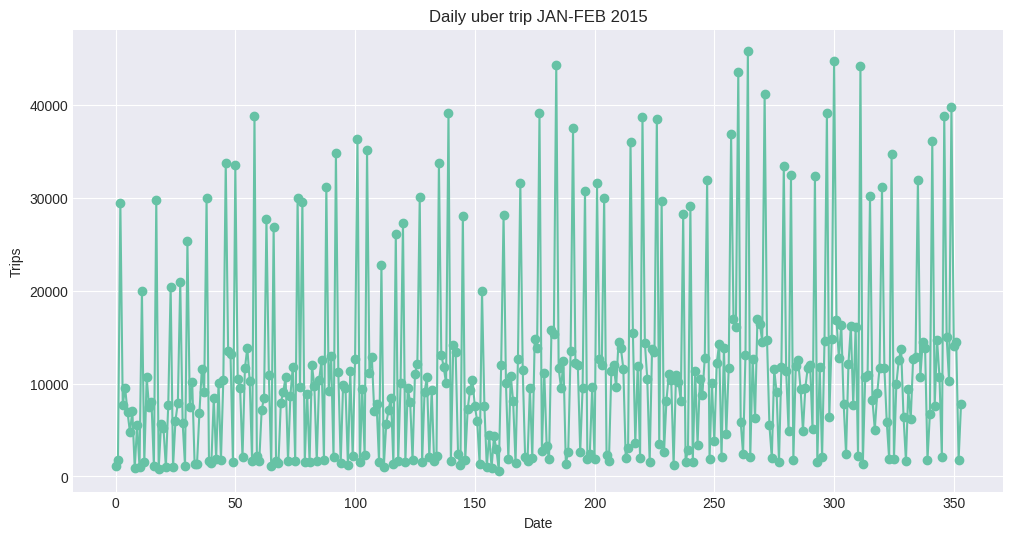

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(ds.index,ds['trips'],marker='o')
plt.title('Daily uber trip JAN-FEB 2015')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.grid(True)
plt.show()

In [ ]:
ds['day'] = ds.index.day
ds['weekday'] = ds.index.day_name()
ds['month'] = ds.index.month
ds.head()

,dispatching_base_number,active_vehicles,trips,day,weekday,month
date,,,,,,
2015-01-01,B02512,190,1132,1,Thursday,1
2015-01-01,B02765,225,1765,1,Thursday,1
2015-01-01,B02764,3427,29421,1,Thursday,1
2015-01-01,B02682,945,7679,1,Thursday,1
2015-01-01,B02617,1228,9537,1,Thursday,1


In [ ]:
# Create lag features (previous days,2 days ago,....)
ds['lag_1'] = ds['trips'].shift(1)
ds['lag_2'] = ds['trips'].shift(2)
ds['lag_3'] = ds['trips'].shift(3)
ds['lag_4'] = ds['trips'].shift(4)
ds['lag_5'] = ds['trips'].shift(5)
ds['lag_3'] = ds['trips'].shift(6)
ds['lag_6'] = ds['trips'].shift(7)
ds['is_weekend'] = ds['weekday'].apply(lambda x: 1 if x >= 5 else 0)

ds.head()


,dispatching_base_number,active_vehicles,trips,day,weekday,month,lag_1,lag_2,lag_3,lag_5,lag_7,lag_4,lag_6,is_weekend
date,,,,,,,,,,,,,,
2015-01-04,B02598,746,5223,4,6,1,NaN,NaN,NaN,NaN,10664.0,NaN,NaN,1
2015-01-04,B02765,183,993,4,6,1,5223.0,NaN,NaN,NaN,7432.0,NaN,NaN,1
2015-01-04,B02617,1088,7729,4,6,1,993.0,5223.0,NaN,NaN,8010.0,NaN,NaN,1
2015-01-04,B02764,2862,20441,4,6,1,7729.0,993.0,NaN,NaN,1088.0,NaN,NaN,1
2015-01-05,B02512,194,984,5,0,1,20441.0,7729.0,NaN,NaN,29729.0,5223.0,NaN,0


In [ ]:
# 0 = Monday, 6 = Sunday
ds['weekday'] = ds.index.dayofweek


In [ ]:
ds.dropna(inplace=True)

In [ ]:
ds.isnull().sum()

,0
dispatching_base_number,0
active_vehicles,0
trips,0
day,0
weekday,0
month,0
lag_1,0
lag_2,0
lag_3,0
lag_5,0


In [ ]:
ds.head()

,dispatching_base_number,active_vehicles,trips,day,weekday,month,lag_1,lag_2,lag_3,lag_5,lag_7,lag_4,lag_6,is_weekend
date,,,,,,,,,,,,,,
2015-01-05,B02764,3387,20926,5,0,1,7899.0,6012.0,993.0,7729.0,5223.0,20441.0,5223.0,0
2015-01-05,B02598,907,5798,5,0,1,20926.0,7899.0,7729.0,20441.0,993.0,984.0,993.0,0
2015-01-05,B02765,227,1133,5,0,1,5798.0,20926.0,20441.0,984.0,7729.0,6012.0,7729.0,0
2015-01-06,B02764,3473,25301,6,1,1,1133.0,5798.0,984.0,6012.0,20441.0,7899.0,20441.0,0
2015-01-06,B02682,1022,7491,6,1,1,25301.0,1133.0,6012.0,7899.0,984.0,20926.0,984.0,0


In [ ]:
ds['rolling_mean'] = ds['trips'].rolling(window=3).mean()
ds.dropna(inplace=True)


In [ ]:
#build and training random forest model for prediction
X=ds[['day','weekday','month','lag_1','lag_2','lag_3','lag_5','lag_7','lag_4','lag_6','is_weekend','rolling_mean']]
y=ds['trips']#target variable(trip count to predict)


In [ ]:
#train set and its label & test set(20%) and its label
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,shuffle=False)#shuffle - But in time series, you can’t randomly mix past and future.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)#in random forest 100 smart trees
rf_model.fit(X_train, y_train) #training


RandomForestRegressor(random_state=42)

In [ ]:
#predictions
y_pred_rf = rf_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error  #MAPE

mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print(f'Random Forest MAPE: {mape_rf:.2%}')


Random Forest MAPE: 54.76%


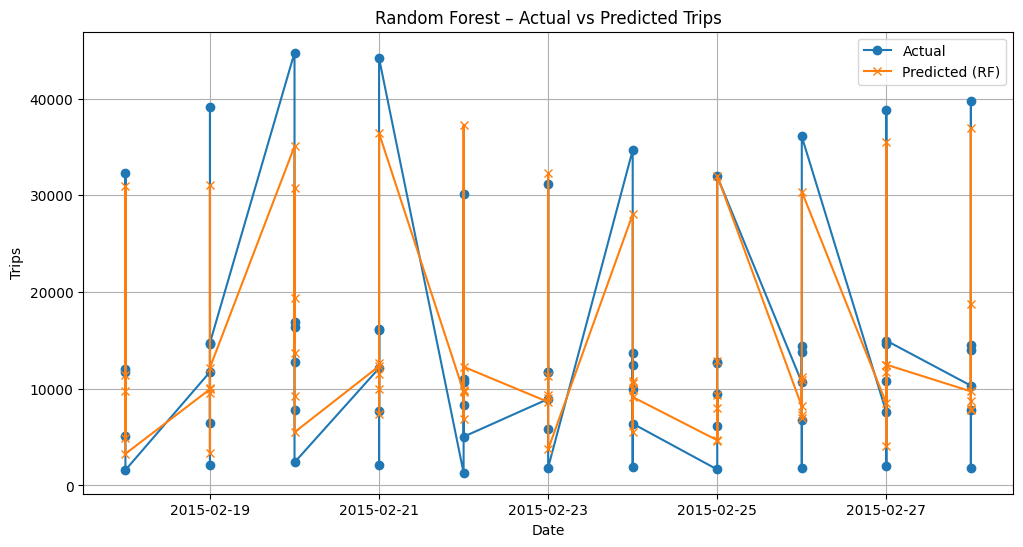

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_rf, label='Predicted (RF)', marker='x')
plt.title('Random Forest – Actual vs Predicted Trips')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

from sklearn.metrics import mean_absolute_percentage_error
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
print(f"XGBoost MAPE: {mape_xgb:.2%}")


XGBoost MAPE: 51.42%


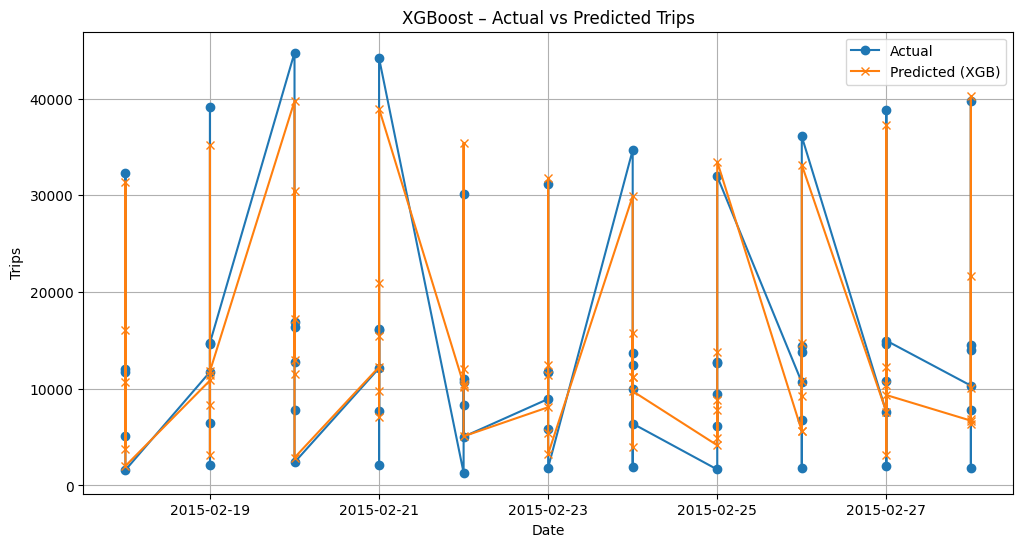

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_xgb, label='Predicted (XGB)', marker='x')
plt.title('XGBoost – Actual vs Predicted Trips')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create result DataFrame
results = pd.DataFrame({
    'Date': y_test.index,
    'Actual Trips': y_test.values,
    'Predicted Trips': y_pred_xgb
})

results.to_csv('uber_trip_predictions.csv', index=False)


In [25]:
                                         #INSIGHTS
# Trips Over Time: Gradual upward trend from Jan to Feb 2015 with weekly patterns.
# By Day of the Week: Weekends (Sat & Sun) have higher trip volumes than weekdays.
# Trip Count Distribution: Most days have low to moderate trips; few days show spikes.
#Heatmap (Day vs Month): Highlights more trips in February; weekends consistently busier.
#Interactive Trend (Plotly): Confirms trend and seasonality; useful for deep-dive date insights.